# Vehicle Telematics

### Preparatives for the LAP technologies project

Dataset:  https://www.kaggle.com/yunlevin/levin-vehicle-telematics/kernels?sortBy=date&group=upvoted&pageSize=20&datasetId=10553

In [1]:
from datetime import datetime
import time
import math
import os
import numpy as np
import scipy as sp
import pandas as pd
from pandas import set_option
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as md
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sklearn
import statsmodels as stm
import patsy
%matplotlib inline

## Description of the columns


__imap__: El sensor de presion absoluta del colector(Sistema de tubos o conductos que se encargan de distribuir la mezcla de aire/combustible que entra al motor en el ciclo de admisión). Esta informacion de presion es util como unidad de control electronica del motor(ECU). Es usado para caldular la densidad del aire y determinar la razon de flujo de aire del motor, que a su vez determina la dosificacion de combustible requerida para una optima combustion del motor e influye en _el avance o retardo del tiempo de encendido.

__kpl__: KMPL es el kilometraje en kilómetros por litro. Es una métrica derivada de la velocidad y la relación de flujo másico de combustible a aire. Esta relación es constante en caso de vehiculos a gasolina, mientras que cambia para otros tipos de combustibles.

__maf__: Sensor de flujo masico de aire. Se utiliza un sensor de flujo de masa (aire) (MAF) para conocer la tasa de flujo másico de aire que ingresa a un motor de combustión interna con inyección de combustible. La información de masa de aire es necesaria para que la unidad de control del motor (ECU) equilibre y entregue la masa de combustible correcta al motor.

__rpm__: Revoluciones por minuto del motor.

__speed__: Velocidad medida por el sensor OBD.

__tAdv__: El avance de la temporización se refiere al número de grados antes del punto muerto superior (BTDC) que la chispa encenderá la mezcla de aire y combustible en la cámara de combustión durante la carrera de compresión.

__IAT__ The Intake Air Temperature sensor has been utilised as an Engine Control Unit (ECU) input signal, as a requirement for calculating the Air Mass volume for the incoming air charge.

__eLoad__ Engine load measures how much air (and fuel) you're sucking into the engine and then compares that value to the theoretical maximum.

__tPos__  Refers to throttle position  


In [2]:
#Import part of the dataset

directory = "/home/andres/LAP_project/"

os.chdir(directory)

trucks = pd.read_csv('allcars.csv', index_col=0)

/home/andres/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/andres/.local/lib/python3.5/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
# Observations and columns

trucks.shape

(7214695, 17)

In [4]:
# List the columns
trucks.columns

Index(['timeStamp', 'tripID', 'accData', 'gps_speed', 'battery', 'cTemp',
       'dtc', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed', 'tAdv',
       'tPos', 'deviceID'],
      dtype='object')

In [5]:
trucks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7214695 entries, 0 to 784214
Data columns (total 17 columns):
timeStamp    object
tripID       int64
accData      object
gps_speed    float64
battery      float64
cTemp        float64
dtc          float64
eLoad        float64
iat          float64
imap         float64
kpl          float64
maf          float64
rpm          float64
speed        float64
tAdv         float64
tPos         float64
deviceID     int64
dtypes: float64(13), int64(2), object(2)
memory usage: 990.8+ MB


In [6]:
#A glimpse of the dataset
trucks.describe()

,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
count,7.214695e+06,5.102549e+06,5.102549e+06,2.099200e+06,2.099200e+06,5.102549e+06,2.099200e+06,2.099200e+06,5.102549e+06,5.102549e+06,5.102549e+06,7.214695e+06,2.099200e+06,5.102549e+06,7.214695e+06
mean,2.221756e+02,8.119788e+00,5.445948e+01,1.539025e+02,1.221911e+02,7.922250e+01,1.358630e+02,1.610007e+02,7.625710e+00,5.722614e+01,9.371084e+02,5.354716e+01,1.229652e+02,5.892806e+01,2.977857e+01
std,2.296085e+02,1.364617e+01,9.954394e+01,1.002028e+02,1.273895e+02,9.028903e+01,1.148390e+02,9.659655e+01,1.384982e+01,9.868818e+01,6.688887e+02,8.419775e+01,1.267519e+02,9.888286e+01,1.794670e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-4.000000e+01,0.000000e+00,0.000000e+00,-4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+01,0.000000e+00,1.000000e+00
25%,6.000000e+01,0.000000e+00,0.000000e+00,7.900000e+01,0.000000e+00,2.392157e+01,3.000000e+01,9.700000e+01,0.000000e+00,6.040000e+00,2.550000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01
50%,1.420000e+02,3.400000e-03,1.250000e+01,9.200000e+01,0.000000e+00,3.725490e+01,4.900000e+01,1.400000e+02,3.796021e+00,9.050000e+00,1.088750e+03,2.060000e+01,2.300000e+01,5.882353e+00,3.500000e+01
75%,3.030000e+02,1.290000e+01,1.418000e+01,2.550000e+02,2.550000e+02,7.843137e+01,2.550000e+02,2.550000e+02,1.524358e+01,2.306000e+01,1.320500e+03,5.500000e+01,2.550000e+02,3.725490e+01,4.600000e+01
max,1.081000e+03,3.332000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.336240e+04,6.019000e+02,1.539150e+04,4.486200e+02,2.550000e+02,2.550000e+02,5.300000e+01


In [7]:
# Split the dataset for truck 2s

df2 = trucks.loc[trucks['deviceID'] == 2]


df2.describe()

,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
count,106659.000000,106659.000000,106659.000000,106460.000000,106460.0,106659.000000,106460.000000,106460.000000,106659.000000,106659.000000,106659.000000,106659.000000,106460.0,106659.000000,106659.0
mean,63.579239,18.188948,0.009114,64.143575,0.0,35.413494,31.122901,96.442175,0.000664,0.025123,1182.769860,33.042819,0.0,0.001324,2.0
std,38.780889,18.726188,0.665543,29.107386,0.0,22.531762,15.797552,47.344598,0.048472,1.834499,762.717486,34.009781,0.0,0.096652,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.0
25%,25.000000,0.000000,0.000000,60.000000,0.0,22.352941,24.000000,97.000000,0.000000,0.000000,800.750000,0.000000,0.0,0.000000,2.0
50%,60.000000,13.600000,0.000000,80.000000,0.0,38.823529,34.000000,99.000000,0.000000,0.000000,1165.750000,25.000000,0.0,0.000000,2.0
75%,99.000000,27.700000,0.000000,81.000000,0.0,48.235294,43.000000,110.000000,0.000000,0.000000,1732.500000,50.000000,0.0,0.000000,2.0
max,126.000000,82.100000,48.607000,84.000000,0.0,94.901961,58.000000,221.000000,3.540058,133.980000,5508.500000,157.000000,0.0,7.058824,2.0


In [8]:
# Get data for individual Trips
# Selected_trip : Id of a particular trip

#selected_trip = 10

#for tripID in set(df4['tripID'].values):
#    df_trip = df4[df4['tripID']==10

#df_trip.head()

## Now we select the largest trips from each vehicle


## Find the largets trip in dataframe and report wich its ID


In [9]:
## Now we select the largest trips from each vehicle


#Find the largets trip in dataframe and report wich its ID

def largest_trip(df, column):
    x = np.zeros(np.max(df[column]))
    for i in range(0,np.max(df[column])):
        x[i] = len(df.loc[df[column] == i])
    return(np.max(x),np.argmax(x))



In [10]:
print('Vehicle 2: ',largest_trip(df2, 'tripID'))

Vehicle 2:  (4256.0, 124)


In [11]:
#Longest trip for car 2

trip124_car2 = df2.loc[df2['tripID'] == 124]


In [12]:
trip124_car2.head()

,timeStamp,tripID,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
102151,2017-12-31 19:25:12.000000,124,0f78fe9806a0070cb50404b60000000000000000000000...,6.5,0.0,64.0,0.0,40.392157,48.0,97.0,0.0,0.0,930.25,14.0,0.0,0.0,2
102152,2017-12-31 19:25:13.000000,124,0f68fe2806100203b60001c60c11c9f80bbc010cbdfd09...,6.5,0.0,64.0,0.0,41.960784,48.0,96.0,0.0,0.0,923.75,14.0,0.0,0.0,2
102153,2017-12-31 19:25:14.000000,124,0f20fe700638040fc20309b8040bbd0711c00007c0060e...,6.5,0.0,64.0,0.0,38.823529,48.0,96.0,0.0,0.0,979.00,14.0,0.0,0.0,2
102154,2017-12-31 19:25:15.000000,124,0fa8fdf806400610b50c10c30911cd060fb70107bbf105...,6.3,0.0,65.0,0.0,41.960784,48.0,97.0,0.0,0.0,992.00,15.0,0.0,0.0,2
102155,2017-12-31 19:25:16.000000,124,0f48fe980660ff0eae0a1cbd1e16d5030fc10817ab0418...,8.1,0.0,65.0,0.0,46.274510,48.0,97.0,0.0,0.0,1094.75,16.0,0.0,0.0,2


## Plot the time series

### Time stamp column to datetime format used by pandas

In [13]:
trip124_car2['timeStamp'] = pd.to_datetime(trip124_car2['timeStamp'], format="%Y-%m-%d %H:%M:%S.%f")

/home/andres/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Function that plot the all relevant features of the dataset


In [14]:

def feature_subplots(df, title):
    df.plot(subplots=True, layout=(9,1),lw= 1.6,figsize=(16, 24),sharex=True, title=title)

In [15]:
#trip124_car2.reset_index()

Dropable_Attributes = ['tripID','gps_speed','battery','deviceID','accData','dtc','tAdv','timeStamp']



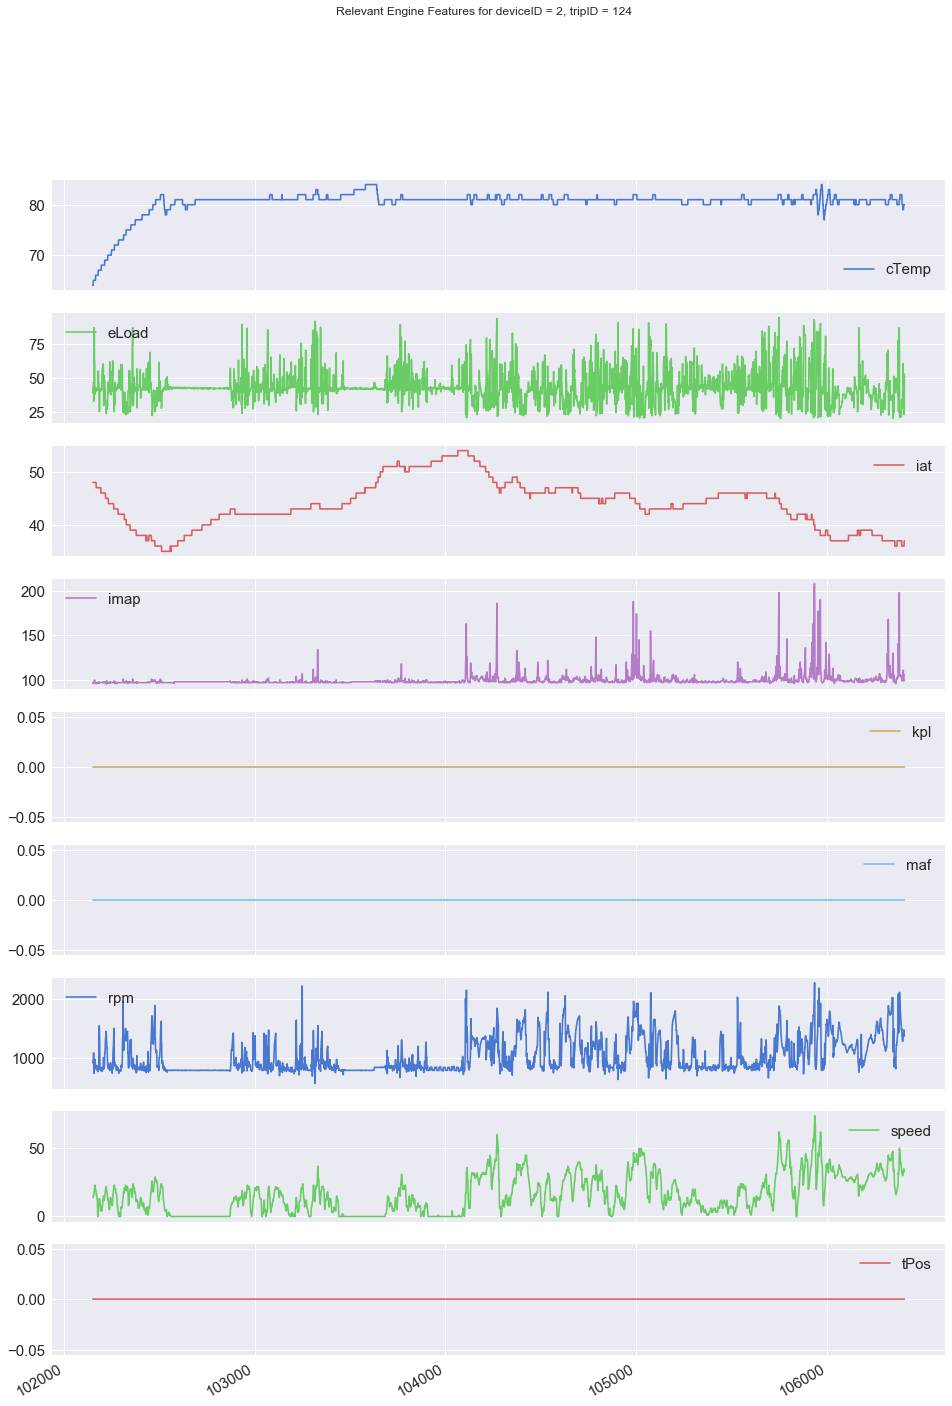

In [16]:
feature_subplots(trip124_car2.drop(Dropable_Attributes, axis = 1), 
                 'Relevant Engine Features for deviceID = 2, tripID = 124')

In [17]:
# Initial exploration of the dataset:
# 
# Scatter matrix and correlation between features
# 

corr_matrix = trip124_car2.drop(Dropable_Attributes, axis = 1).corr()

corr_matrix["rpm"].sort_values(ascending=False)


rpm      1.000000
speed    0.795789
imap     0.523511
cTemp    0.058691
iat     -0.135777
eLoad   -0.248719
kpl           NaN
maf           NaN
tPos          NaN
Name: rpm, dtype: float64

__imap__: El sensor de presion absoluta del colector(Sistema de tubos o conductos que se encargan de distribuir la mezcla de aire/combustible que entra al motor en el ciclo de admisión). Esta informacion de presion es util como unidad de control electronica del motor(ECU). Es usado para caldular la __densidad del aire__ y determinar la __razon de flujo de aire del motor__, que a su vez determina la __dosificacion de combustible requerida para una optima combustion del motor__ e influye en ___el avance o retardo del tiempo de encendido.__

__kpl__: KMPL es el kilometraje en kilómetros por litro. Es una métrica derivada de la velocidad y __*la relación de flujo másico de combustible a aire*__. Esta relación es constante en caso de vehiculos a gasolina, mientras que cambia para otros tipos de combustibles.

__maf__: Sensor de flujo masico de aire. Se utiliza un sensor de flujo de masa (aire) (MAF) para conocer la __tasa de flujo másico de aire que ingresa a un motor de combustión interna con inyección de combustible__. La información de masa de aire es necesaria para que la unidad de control del motor (ECU) equilibre y entregue __la masa de combustible correcta al motor__.

__rpm__: Revoluciones por minuto del motor.

__speed__: Velocidad medida por el sensor OBD.

__tAdv__: El avance de la temporización se refiere al número de grados antes del punto muerto superior (BTDC) que la chispa encenderá la mezcla de aire y combustible en la cámara de combustión durante la carrera de compresión.

__IAT__  The Intake Air Temperature sensor has been utilised as an Engine Control Unit (ECU) input signal, as a requirement for calculating the Air Mass volume for the incoming air charge. 

__eLoad__ Engine load measures how much air (and fuel) you're sucking into the engine and then compares that value to the theoretical maximum. 


# Preparing the Dataset.

## 1) Handling Missing Values : Linear interpolation

### (Best method according to Charu Aggarwal-Data Mining)


In [18]:
trip124_car2.columns

Index(['timeStamp', 'tripID', 'accData', 'gps_speed', 'battery', 'cTemp',
       'dtc', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed', 'tAdv',
       'tPos', 'deviceID'],
      dtype='object')

In [19]:
#trip124_car2 = trip124_car2.drop(Dropable_Attributes, axis = 1)


In [20]:
trip124_car2 = trip124_car2.replace(0.0,np.nan)


trip124_car2['cTemp'] = trip124_car2['cTemp'].interpolate();
trip124_car2['eLoad'] = trip124_car2['eLoad'].interpolate();
trip124_car2['iat'] = trip124_car2['iat'].interpolate();
trip124_car2['imap'] = trip124_car2['imap'].interpolate();
trip124_car2['rpm'] = trip124_car2['rpm'].interpolate(); 
trip124_car2['speed'] = trip124_car2['speed'].interpolate();
trip124_car2['tPos'] = trip124_car2['tPos'].interpolate();


#interpolated_car2 = trip136_car4temp.drop(['dtc','tripID','deviceID'], axis = 1).interpolate(algorithm='linear', order=2)

#time = interpolated_car2.index
#datetimeformat = '%H:%M:%S'



In [21]:
#We check that there are no missing values in the dataframe
zeros = trip124_car2.loc[trip124_car2['imap'] == 0.0]
print(zeros)

Empty DataFrame
Columns: [timeStamp, tripID, accData, gps_speed, battery, cTemp, dtc, eLoad, iat, imap, kpl, maf, rpm, speed, tAdv, tPos, deviceID]
Index: []


In [22]:
trip124_car2.reset_index()


,index,timeStamp,tripID,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
0,102151,2017-12-31 19:25:12,124,0f78fe9806a0070cb50404b60000000000000000000000...,6.5,NaN,64.0,NaN,40.392157,48.0,97.0,NaN,NaN,930.25,14.000000,NaN,NaN,2
1,102152,2017-12-31 19:25:13,124,0f68fe2806100203b60001c60c11c9f80bbc010cbdfd09...,6.5,NaN,64.0,NaN,41.960784,48.0,96.0,NaN,NaN,923.75,14.000000,NaN,NaN,2
2,102153,2017-12-31 19:25:14,124,0f20fe700638040fc20309b8040bbd0711c00007c0060e...,6.5,NaN,64.0,NaN,38.823529,48.0,96.0,NaN,NaN,979.00,14.000000,NaN,NaN,2
3,102154,2017-12-31 19:25:15,124,0fa8fdf806400610b50c10c30911cd060fb70107bbf105...,6.3,NaN,65.0,NaN,41.960784,48.0,97.0,NaN,NaN,992.00,15.000000,NaN,NaN,2
4,102155,2017-12-31 19:25:16,124,0f48fe980660ff0eae0a1cbd1e16d5030fc10817ab0418...,8.1,NaN,65.0,NaN,46.274510,48.0,97.0,NaN,NaN,1094.75,16.000000,NaN,NaN,2
5,102156,2017-12-31 19:25:17,124,0f70fe780648f304c41b17d00608baf909bdf402bf000b...,8.3,NaN,65.0,NaN,32.549020,48.0,97.0,NaN,NaN,1067.50,16.000000,NaN,NaN,2
6,102157,2017-12-31 19:25:18,124,0ee0fe8006b80111c0fe10c4f60aaa0521ba010db9e005...,6.3,NaN,65.0,NaN,39.607843,48.0,97.0,NaN,NaN,858.75,16.000000,NaN,NaN,2
7,102158,2017-12-31 19:25:19,124,0f30fe700690e8f8c40522b30208b6000fc40515c60011...,6.8,NaN,65.0,NaN,86.666667,48.0,97.0,NaN,NaN,749.75,18.000000,NaN,NaN,2
8,102159,2017-12-31 19:25:20,124,0f38fe800690080bc1fb14c50516c8f812c50f0db8f100...,5.6,NaN,65.0,NaN,84.705882,48.0,98.0,NaN,NaN,862.00,18.000000,NaN,NaN,2
9,102160,2017-12-31 19:25:21,124,0f50fea80698f20da8e3009a0c1cb90c19aff3fbc41d07...,6.7,NaN,65.0,NaN,61.568627,48.0,100.0,NaN,NaN,862.00,21.000000,NaN,NaN,2


# 1.2 Noise removal: Triple exponential smoothing or Holt-Winters method with global optimization

### Now we will use the Fecon235 python library to implment the Holt-Winters method with global optimization.

### Be carefull! In general, the gradient descent technique may be trapped in local optima if the problem being solved is not convex. Rather, you should use a global optimization technique such as Genetic Algorithms, PSO algorithms, Estimation of Distribution Algorithms, etc.

### The optimize_holt function is a minimum brute force algorithm.


In [23]:
from fecon235.fecon235 import *
grids = 20

go_cTemp = trip124_car2.drop(['timeStamp', 'tripID', 'accData', 'gps_speed', 'battery',
       'dtc', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed', 'tAdv',
       'tPos', 'deviceID'],axis = 1)


#Global optimization of parametters alpha and beta for Holt-Winters method
alpha = 0; beta = 0; losspc = 0; loss = 0;
alpha, beta, losspc, loss = optimize_holt(go_cTemp, grids=grids, alphas=(0.0, 1.0), betas=(0.0, 1.0))

#Holt_Winters method with the optimal alpha and beta parameters
holt_cTemp = holt(go_cTemp, alpha=alpha, beta=beta)
holt_cTemp.head()

,Y,Level,Growth
102151,64.0,64.00000,0.0
102152,64.0,64.00000,0.0
102153,64.0,64.00000,0.0
102154,65.0,64.78950,0.0
102155,65.0,64.95569,0.0


# For all features

In [24]:

def holt_features(df,grids):
    alpha = 0; beta = 0; losspc = 0; loss = 0;    
    alpha, beta, losspc, loss = optimize_holt(df, grids=grids, alphas=(0.0, 1.0), betas=(0.0, 1.0))
    holtdf = holt(df, alpha=alpha, beta=beta)
    return(holtdf)




In [25]:
#trip124_car2.columns

In [26]:
go_iat = trip124_car2.drop(['timeStamp', 'tripID', 'accData', 'gps_speed', 'battery', 'cTemp',
       'dtc', 'eLoad',  'imap', 'kpl', 'maf', 'rpm', 'speed', 'tAdv',
       'tPos', 'deviceID'],axis = 1)
holt_iat = holt_features(go_iat,grids)

go_imap = trip124_car2.drop(['timeStamp', 'tripID', 'accData', 'gps_speed', 'battery', 'cTemp',
       'dtc', 'eLoad',  'imap', 'kpl', 'maf', 'rpm', 'speed', 'tAdv',
       'tPos', 'deviceID'],axis = 1)
holt_imap = holt_features(go_imap,grids)

go_rpm = trip124_car2.drop(['timeStamp', 'tripID', 'accData', 'gps_speed', 'battery', 'cTemp',
       'dtc', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'speed', 'tAdv',
       'tPos', 'deviceID'],axis = 1)
holt_rpm = holt_features(go_rpm,grids)

go_speed = trip124_car2.drop(['timeStamp', 'tripID', 'accData', 'gps_speed', 'battery', 'cTemp',
       'dtc', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'tAdv',
       'tPos', 'deviceID'],axis = 1)
holt_speed = holt_features(go_speed,grids)

go_eLoad = trip124_car2.drop(['timeStamp', 'tripID', 'accData', 'gps_speed', 'battery', 'cTemp',
       'dtc',  'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed', 'tAdv',
       'tPos', 'deviceID'],axis = 1)
holt_eLoad = holt_features(go_eLoad,grids)

### 1.3 Normalization 

In [27]:
# Normalize time series data

from pandas import Series
from sklearn.preprocessing import MinMaxScaler

trip124scaled = pd.DataFrame()

trip124scaled = pd.concat([holt_cTemp['Y'],holt_eLoad['Y'],holt_iat['Y'],holt_imap['Y'],holt_rpm['Y'],
                         holt_speed['Y']],axis = 1)
values = trip124scaled.values
len(values)


4256

In [28]:
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(values)
trip124scaled = pd.DataFrame(scaled_df, columns=['cTemp','eLoad','iat','imap','rpm','speed'])

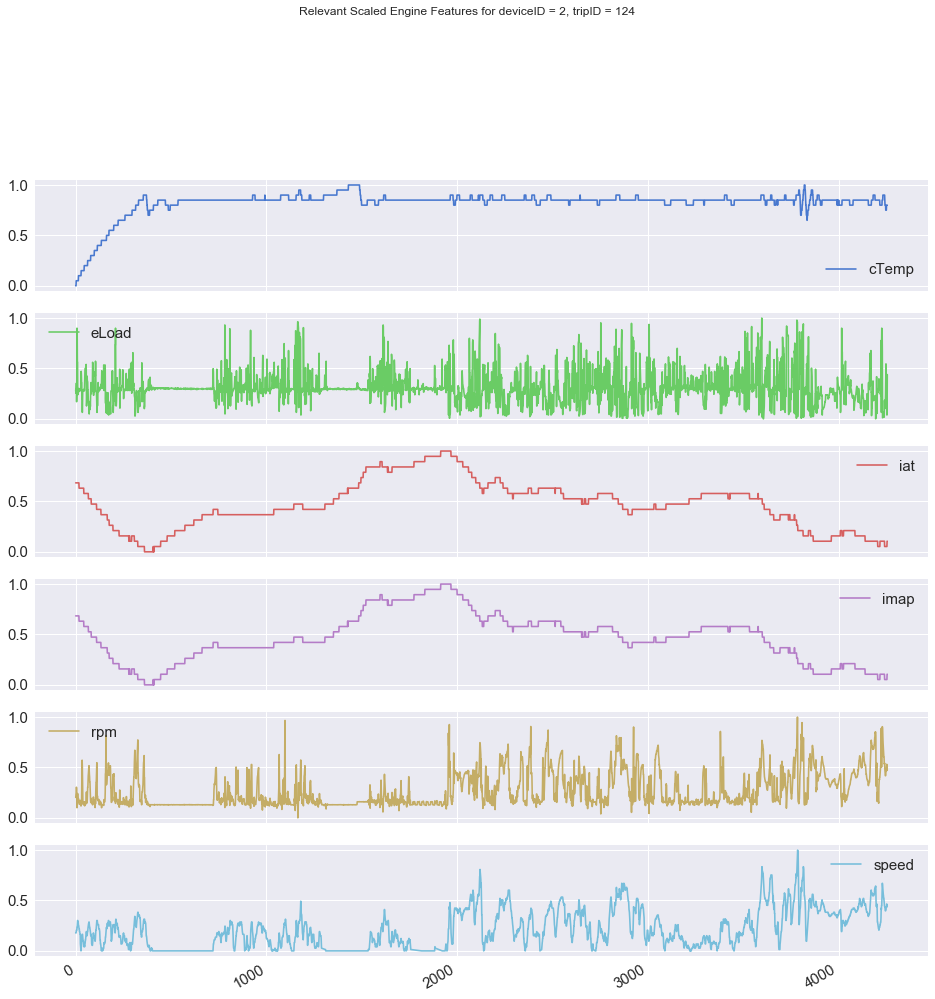

In [29]:
feature_subplots(trip124scaled,'Relevant Scaled Engine Features for deviceID = 2, tripID = 124')

## Looking for correlations between data

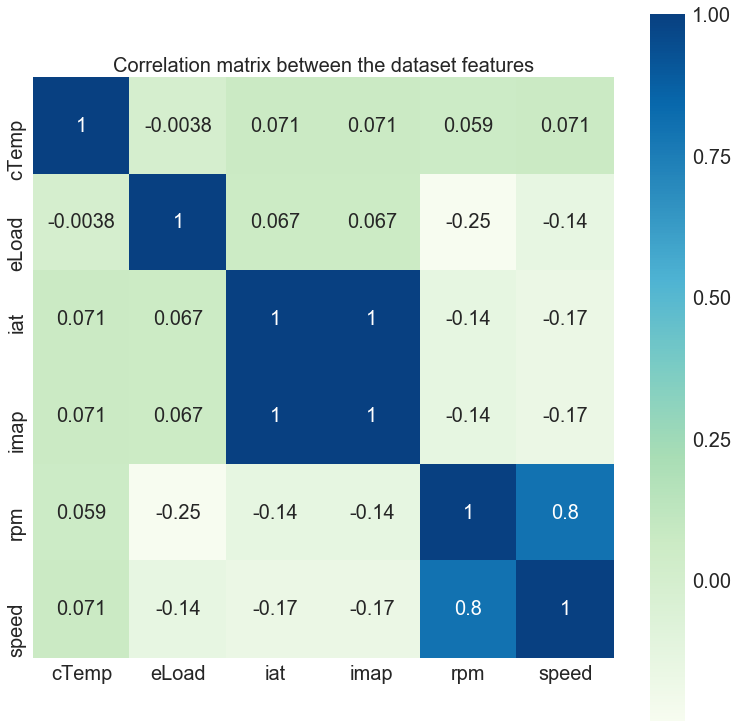

In [30]:
import seaborn as sns

correlation_matrix = trip124scaled.corr()

plt.figure(figsize=(13,13))

plt.rcParams.update({'font.size': 20})
plt.rc('axes', titlesize = 20)
plt.rc('axes', labelsize = 10)
plt.rc('xtick', labelsize = 20)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 20)    # fontsize of the tick labels
plt.rc('legend', fontsize = 20)    # legend fontsize
plt.rc('figure', titlesize = 20)
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='GnBu')
plt.title('Correlation matrix between the dataset features')
plt.savefig('correlation_matrix.png', format='png', dpi=300)
plt.show()


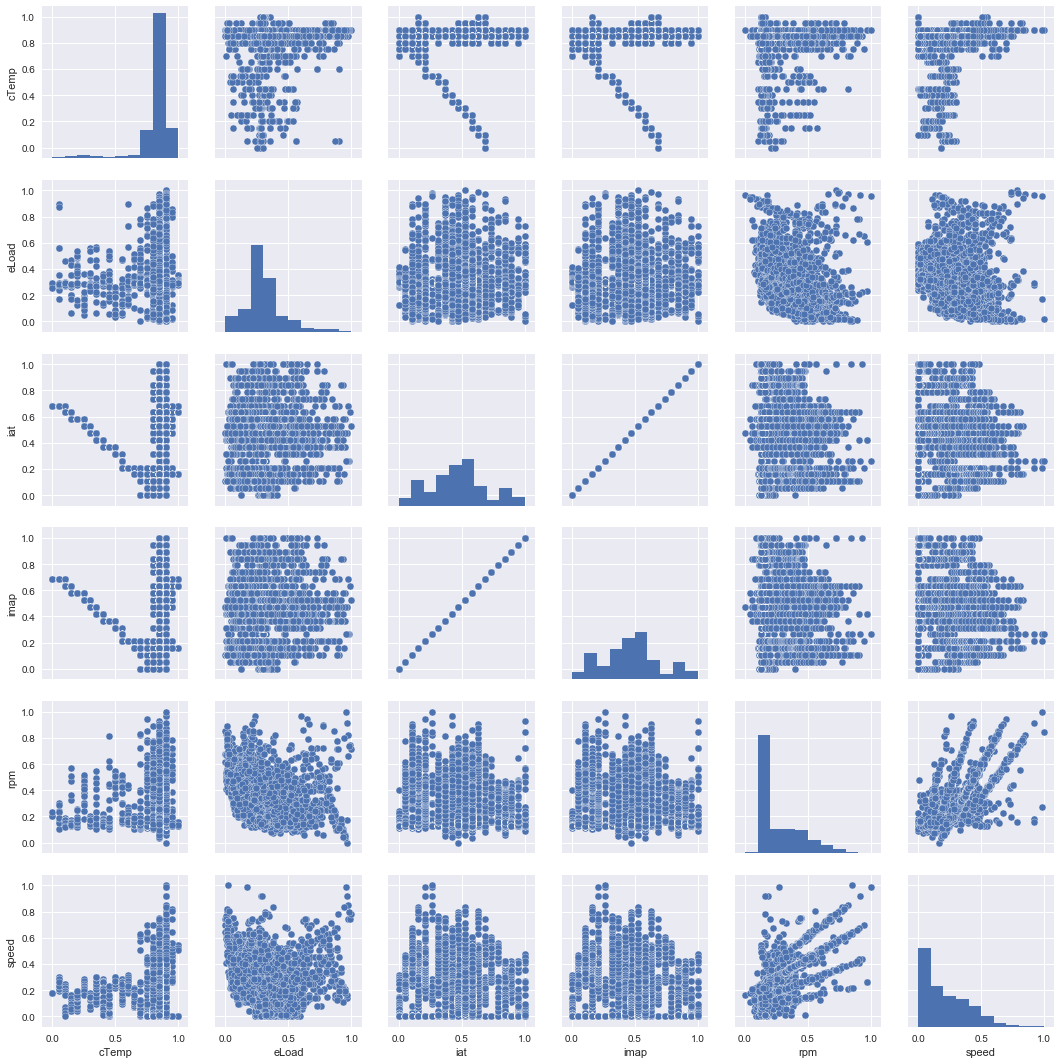

In [31]:
sns.set()
sns.pairplot(trip124scaled)
plt.savefig('pairplot.png', format='png', dpi=300)

## Correlation between two timeseries


The objetive is visualize the correlation between two time series

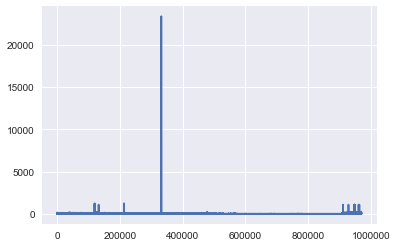

In [32]:
plt.plot(trucks['kpl'])


In [33]:
# First, print the veicles with the higgest travel load 

#trucks['deviceID'].value_counts()

In [34]:
# The Vehicle N° 45 seems to have a fairly complete data

df1 = trucks.loc[trucks['deviceID'] == 45]

df1.describe()

,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
count,576251.000000,576251.000000,576251.000000,353459.000000,353459.000000,576251.000000,353459.000000,353459.000000,576251.000000,576251.000000,576251.000000,576251.000000,353459.000000,576251.000000,576251.0
mean,480.844269,15.085641,0.009842,55.342976,0.013707,33.760853,22.451467,79.292670,6.068113,9.519851,893.547294,26.031153,0.013707,0.008616,45.0
std,308.766972,14.875475,1.487815,37.097325,1.869547,30.790551,15.045215,49.180222,5.752331,7.756045,565.705465,26.350722,1.869547,1.464714,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.0
25%,210.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.190000,740.000000,0.000000,0.000000,0.000000,45.0
50%,468.000000,11.100000,0.000000,68.000000,0.000000,27.058824,28.000000,99.000000,5.222473,8.580000,973.000000,18.000000,0.000000,0.000000,45.0
75%,732.000000,25.700000,0.000000,90.000000,0.000000,63.529412,34.000000,106.000000,9.949401,13.520000,1327.000000,46.000000,0.000000,0.000000,45.0
max,1045.000000,276.580000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,32.463338,255.000000,5508.500000,255.000000,255.000000,255.000000,45.0


In [35]:
#Identify the length of the trips

#df1['tripID'].value_counts()

In [36]:
print('Vehicle 1: ',largest_trip(df1, 'tripID'))

Vehicle 1:  (4720.0, 40)


In [37]:
trip40_car45 =  df1.loc[df1['tripID'] == 40]

trip40_car45['timeStamp'] = pd.to_datetime(trip40_car45['timeStamp'], format="%Y-%m-%d %H:%M:%S.%f")

trip40_car45.head()

/home/andres/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,timeStamp,tripID,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
26566,2017-10-21 10:52:04.000,40,03a8fb8003f8eedef30acfbff6d0dc0ae0bbfbe0ccf5cf...,73.3,0.0,NaN,NaN,69.411765,NaN,NaN,10.566726,22.30,1547.0,78.0,NaN,0.0,45
26567,2017-10-21 10:52:05.000,40,03e8fb5003e801ccdbf6dee9e7c6f7e9e2e8f8d0c8fdc8...,73.1,0.0,NaN,NaN,70.196078,NaN,NaN,8.858909,26.94,1556.0,79.0,NaN,0.0,45
26568,2017-10-21 10:52:06.000,40,03a8fb6003d001d0c4ffd1e10ac2e008b4d3f6cb0805cf...,74.6,0.0,NaN,NaN,0.784314,NaN,NaN,10.663941,22.38,1578.5,79.0,NaN,0.0,45
26569,2017-10-21 10:52:08.000,40,03c0fb780380f8e7bbe3d2a103dadaf3cee907d8c90ec6...,77.7,0.0,NaN,NaN,44.705882,NaN,NaN,14.989695,15.72,1547.5,78.0,NaN,0.0,45
26570,2017-10-21 10:52:08.500,40,03d8fb4003b8f1c0d505c0f9f8cfdcf1cce9f8cdcaf0d8...,77.7,0.0,NaN,NaN,69.803922,NaN,NaN,13.731818,17.16,1547.5,78.0,NaN,0.0,45


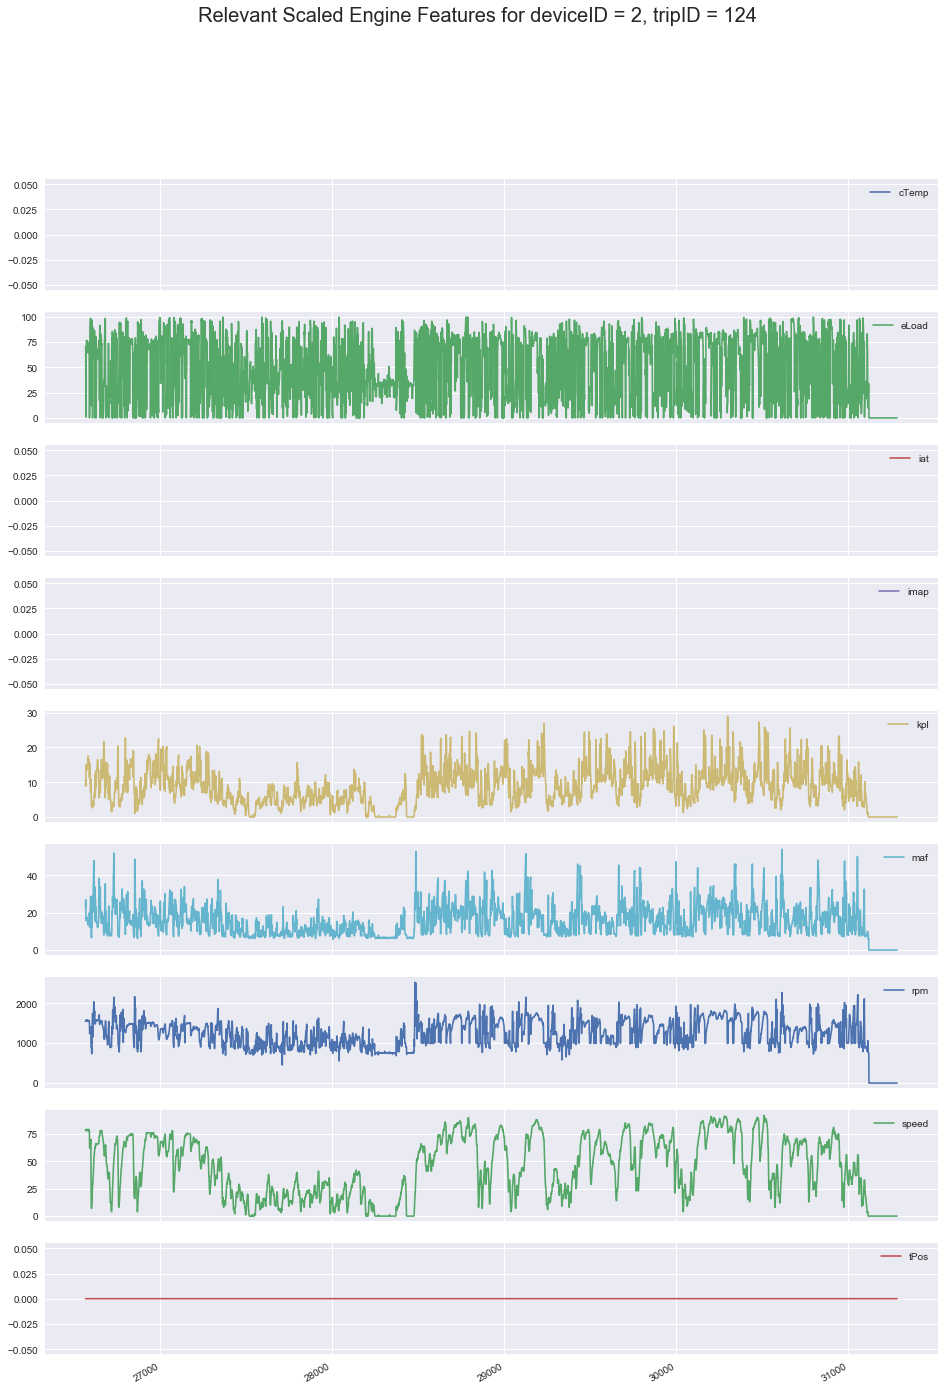

In [38]:
feature_subplots(trip40_car45.drop(Dropable_Attributes, axis = 1),'Relevant Scaled Engine Features for deviceID = 2, tripID = 124')

### 1) Handling Missing Values : Linear interpolation
(Best method according to Charu Aggarwal-Data Mining)¶

In [40]:
trip40_car45 = trip40_car45.replace(0.0,np.nan)


trip40_car45['eLoad'] = trip40_car45['eLoad'].interpolate();
trip40_car45['kpl'] = trip40_car45['kpl'].interpolate();
trip40_car45['maf'] = trip40_car45['maf'].interpolate();
trip40_car45['rpm'] = trip40_car45['rpm'].interpolate(); 
trip40_car45['speed'] = trip40_car45['speed'].interpolate();



## 1.2 Noise removal: Triple exponential smoothing or Holt-Winters method with global optimization

In [41]:
trip40_car45.columns

Index(['timeStamp', 'tripID', 'accData', 'gps_speed', 'battery', 'cTemp',
       'dtc', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed', 'tAdv',
       'tPos', 'deviceID'],
      dtype='object')

In [42]:
car45_eLoad = trip40_car45.drop(['timeStamp', 'tripID', 'accData', 'gps_speed', 'battery', 'cTemp',
       'dtc', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed', 'tAdv',
       'tPos', 'deviceID'],axis = 1)
holt45_eLoad = holt_features(car45_eLoad,grids)

########################################

car45_kpl = trip40_car45.drop(['timeStamp', 'tripID', 'accData', 'gps_speed', 'battery', 'cTemp',
       'dtc', 'eLoad', 'iat', 'imap', 'maf', 'rpm', 'speed', 'tAdv',
       'tPos', 'deviceID'],axis = 1)
holt45_kpl = holt_features(car45_kpl,grids)

##########################################

car45_rpm = trip40_car45.drop(['timeStamp', 'tripID', 'accData', 'gps_speed', 'battery', 'cTemp',
       'dtc', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'speed', 'tAdv',
       'tPos', 'deviceID'],axis = 1)
holt45_rpm = holt_features(car45_rpm,grids)

##########################################

car45_speed = trip40_car45.drop(['timeStamp', 'tripID', 'accData', 'gps_speed', 'battery', 'cTemp',
       'dtc', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'tAdv',
       'tPos', 'deviceID'],axis = 1)
holt45_speed = holt_features(car45_speed,grids)



# Normalization 

In [43]:
trip40_car45_scaled = pd.DataFrame()

trip40_car45_scaled = pd.concat([holt45_eLoad['Y'],holt45_kpl['Y'],holt45_rpm['Y'],holt45_speed['Y']],axis = 1)
values = trip40_car45_scaled.values
len(values)

4720

In [44]:
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(values)
trip40_car45_scaled = pd.DataFrame(scaled_df, columns=['eLoad','kpl','rpm','speed'])

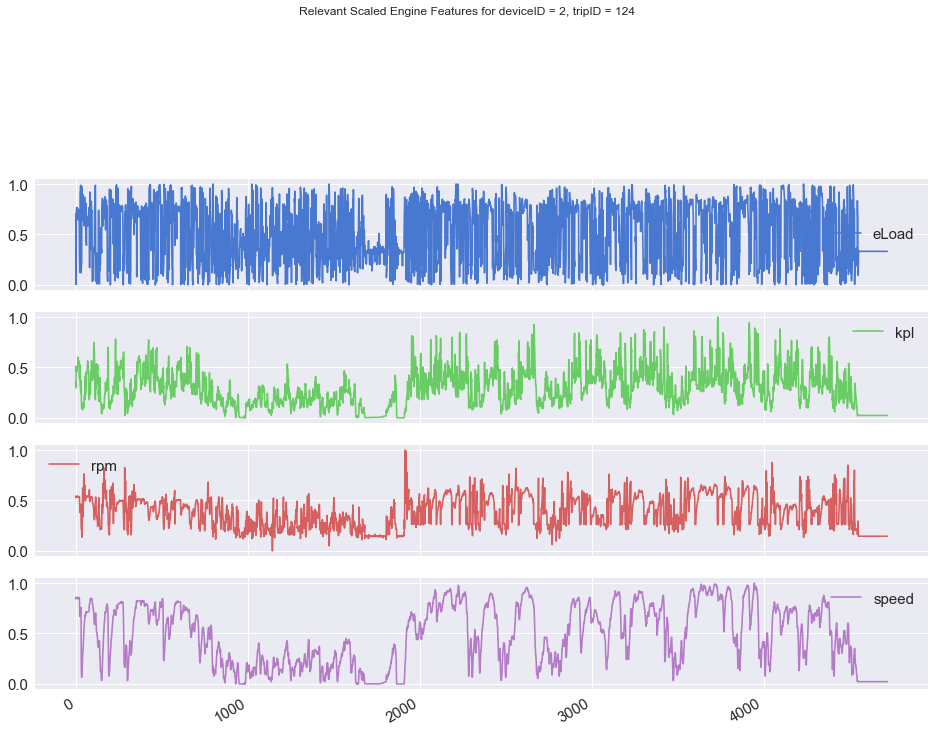

In [48]:
feature_subplots(trip40_car45_scaled,'Relevant Scaled Engine Features for deviceID = 2, tripID = 124')

In [56]:
trip40_car45_scaled.columns

Index(['eLoad', 'kpl', 'rpm', 'speed'], dtype='object')

In [57]:
trip124scaled.columns

Index(['cTemp', 'eLoad', 'iat', 'imap', 'rpm', 'speed'], dtype='object')

## Correlation between two timeseries


The objetive is visualize the correlation between two related series to find conections between data



In [ ]:
### Cross correlation 

import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2, fftshift
 
def cross_correlation_using_fft(x, y):
    f1 = fft(x)
    f2 = fft(np.flipud(y))
    cc = np.real(ifft(f1 * f2))
    return fftshift(cc)
 
# shift &lt; 0 means that y starts 'shift' time steps before x # shift &gt; 0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift



In [ ]:
# Correlation between equal time series

trip40_car45_np = trip40_car45_scaled['eLoad'].values()




### DTC's, or Diagnostic Trouble Codes
Let search the unique values of DTC's¶

In [39]:
#   DTC's, or Diagnostic Trouble Codes is the trouble code engine 
# Lests search the unique values of DTC's

#Find the elements
failure = trucks.loc[trucks['dtc'] != 0]

failure['dtc'].unique()



array([ nan, 255.])

In [40]:
#Identify the cars with the 255 failure

failure_255 = trucks.loc[trucks['dtc'] == 255]
failure_cars = failure_255['deviceID'].unique()
failure_cars

array([12, 16, 22, 23, 24, 43, 45, 46, 50, 51, 53])

### Seems to e that the 255 issue can be related to failures in the sensors

Is necessary identify the problematic cars

In [79]:
#pure_255 = trucks.loc[(trucks['dtc'] == 255) & (trucks['imap'] == 255) & (trucks['battery'] == 255)]

pure_255 = trucks.loc[(trucks['dtc'] == 255) & (trucks['tPos'] == 255) ]
pure_255

,timeStamp,tripID,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
4323,2017-10-06 13:56:39.000000,0,08380830fd30d9e0d4d9e1d7dae2d6dae0d7d9e0d7dae0...,0.0000,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,12
4324,2017-10-06 13:56:40.000000,0,08000820fd40d9dfdbd9e0d8d9e0d5dae1d6dae0d8dae0...,0.0000,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,12
4325,2017-10-06 13:56:41.000000,0,08300828fce8dae0d6dbe1d8dbe0d6dae0d7dae0d9d9e0...,0.0000,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,12
4326,2017-10-06 13:56:42.000000,0,07700840fb90d9e1d6d9e0d7dae1d7d9e1d7dbe1d7dae0...,0.0000,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,12
4327,2017-10-06 13:56:43.000000,0,08600810fcd0d9e0d8dae0d9dae1d6dae0d6d9dfd5dae1...,0.0000,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,12
4328,2017-10-06 13:56:44.000000,0,08200800fd30dbe2d8d9dfdad8e0d9dadfd7d9e0d7dadf...,0.0000,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,12
4329,2017-10-06 13:56:45.000000,0,08480808fd08dae0d5dae0d6dae1d3dae2d5d9e2d8d9e0...,0.0000,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,12
4330,2017-10-06 13:56:46.000000,0,08300820fcc0d8e1d8dbe0d7d9deddd9e0d6d8dfd9dae1...,0.0000,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,12
4331,2017-10-06 13:56:47.000000,0,08380810fcf8dae0d8d9dfd9d9e0d8dae0d6d9dfdad9e1...,0.0000,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,12
4332,2017-10-06 13:56:48.000000,0,08400820fd48d9e0d6dae0d8dae1d7dae1d6dae0d6dbe1...,0.0000,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,12


### The cars 12 and 53 seems to have problems with their sensors

In [91]:
# Check the time series of car 24

car_45 = trucks.loc[trucks['deviceID'] == 45]

# Check if have sensor patologies

car24_pure_255 = car_45.loc[(car_45['dtc'] == 255) & (car_45['tPos'] == 255) ]
car24_pure_255


,timeStamp,tripID,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
21864,2017-10-20 15:45:26.000000,32,0718fb580378f9d0daf9d1d90000000000000000000000...,0.0,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21865,2017-10-20 15:45:27.000000,32,0728fb880380fad1dafad0dafad1d8fad0d9f9d2daf9d0...,0.0,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21866,2017-10-20 15:45:28.000000,32,0758fb9003a0fad1d9fbd2daf9d1dafad1d9fad1d9f9d2...,0.0,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21867,2017-10-20 15:45:29.000000,32,0708fb8002a8fad1dafad0d9fad0daf9d1dafad2d9fad0...,0.0,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21868,2017-10-20 15:45:30.000000,32,0738fb600328f9d1d9f9d0dbfad1d9fad1d9fbd1d8fad1...,0.9,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21869,2017-10-20 15:45:31.000000,32,0730fb600318fad1dafbd1daf9d1daf9d1d9fad1dafbd1...,1.2,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21870,2017-10-20 15:45:32.000000,32,0720fb900340fbd1d8fad0d9fad1d9fad1dbfad1dbf9d1...,1.9,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21871,2017-10-20 15:45:33.000000,32,0720fb680360fad1d8f9d0d9f9d1dafad1dafad0d8f9d1...,2.4,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21872,2017-10-20 15:45:34.000000,32,0718fb580328fad0daf8d1d9fad2dbfad1d9fad2daf9d1...,3.0,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21873,2017-10-20 15:45:35.000000,32,0710fb480358f8d0d8fad1dafad2dbfad2daf9d0dcfad0...,3.2,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45


In [53]:
#car_45['tripID'].value_counts()

### Now, the task is to find the trip in where the failure was present


In [93]:
#Find the largets trip in dataframe and report wich its ID



#Find the largets trip in dataframe and report wich its ID

def largest_damaged_trip(df, column, car):
    dfail = df.loc[df['deviceID'] == car]
    x = np.zeros(np.max(dfail[column]))
    for i in range(0,np.max(dfail[column])):
        x[i] = len(dfail.loc[dfail[column] == i])
    return(np.max(x),np.argmax(x))

In [95]:
carv = 45

print('Vehicle:',carv, largest_damaged_trip(car_45, 'tripID', carv))



Vehicle: 45 (4720.0, 40)


### For the  vehicle # 53

In [96]:
#Longest trip for car 53

trip40_car45 = trucks.loc[trucks['deviceID'] == carv]



In [97]:
 trip40_car45.loc[trip40_car45['dtc'] == 255]

,timeStamp,tripID,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
21864,2017-10-20 15:45:26.000000,32,0718fb580378f9d0daf9d1d90000000000000000000000...,0.0,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21865,2017-10-20 15:45:27.000000,32,0728fb880380fad1dafad0dafad1d8fad0d9f9d2daf9d0...,0.0,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21866,2017-10-20 15:45:28.000000,32,0758fb9003a0fad1d9fbd2daf9d1dafad1d9fad1d9f9d2...,0.0,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21867,2017-10-20 15:45:29.000000,32,0708fb8002a8fad1dafad0d9fad0daf9d1dafad2d9fad0...,0.0,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21868,2017-10-20 15:45:30.000000,32,0738fb600328f9d1d9f9d0dbfad1d9fad1d9fbd1d8fad1...,0.9,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21869,2017-10-20 15:45:31.000000,32,0730fb600318fad1dafbd1daf9d1daf9d1d9fad1dafbd1...,1.2,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21870,2017-10-20 15:45:32.000000,32,0720fb900340fbd1d8fad0d9fad1d9fad1dbfad1dbf9d1...,1.9,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21871,2017-10-20 15:45:33.000000,32,0720fb680360fad1d8f9d0d9f9d1dafad1dafad0d8f9d1...,2.4,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21872,2017-10-20 15:45:34.000000,32,0718fb580328fad0daf8d1d9fad2dbfad1d9fad2daf9d1...,3.0,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45
21873,2017-10-20 15:45:35.000000,32,0710fb480358f8d0d8fad1dafad2dbfad2daf9d0dcfad0...,3.2,255.0,255.0,255.0,255.0,255.0,255.0,3.021,255.0,255.0,255.0,255.0,255.0,45


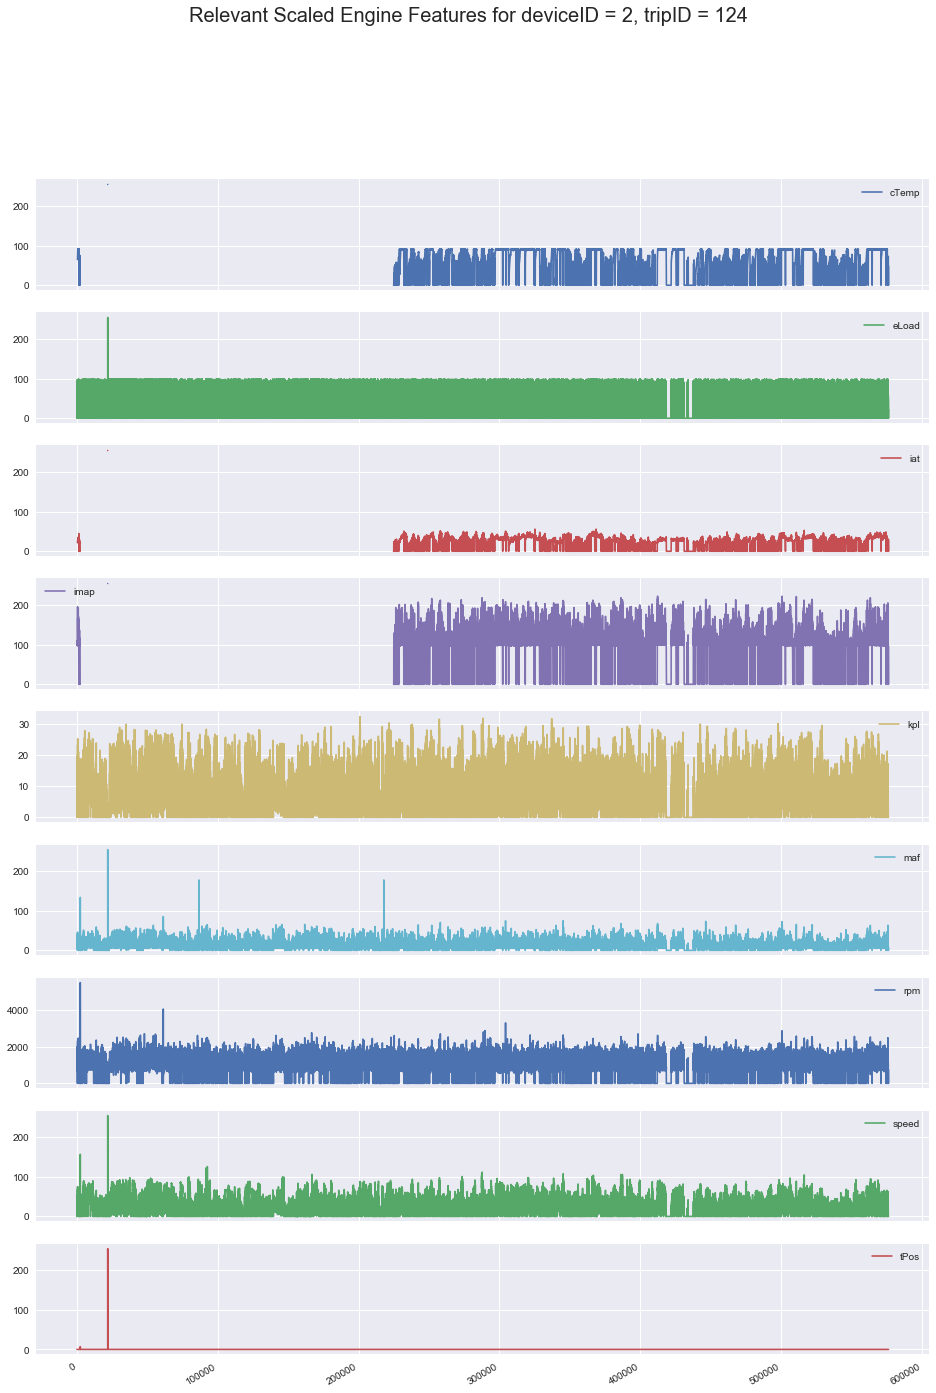

In [98]:
feature_subplots(trip40_car45.drop(Dropable_Attributes, axis = 1),'Relevant Scaled Engine Features for deviceID = 2, tripID = 124')

In [101]:
trip40_car45.describe()

,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
count,576251.000000,576251.000000,576251.000000,353459.000000,353459.000000,576251.000000,353459.000000,353459.000000,576251.000000,576251.000000,576251.000000,576251.000000,353459.000000,576251.000000,576251.0
mean,480.844269,15.085641,0.009842,55.342976,0.013707,33.760853,22.451467,79.292670,6.068113,9.519851,893.547294,26.031153,0.013707,0.008616,45.0
std,308.766972,14.875475,1.487815,37.097325,1.869547,30.790551,15.045215,49.180222,5.752331,7.756045,565.705465,26.350722,1.869547,1.464714,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.0
25%,210.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.190000,740.000000,0.000000,0.000000,0.000000,45.0
50%,468.000000,11.100000,0.000000,68.000000,0.000000,27.058824,28.000000,99.000000,5.222473,8.580000,973.000000,18.000000,0.000000,0.000000,45.0
75%,732.000000,25.700000,0.000000,90.000000,0.000000,63.529412,34.000000,106.000000,9.949401,13.520000,1327.000000,46.000000,0.000000,0.000000,45.0
max,1045.000000,276.580000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,32.463338,255.000000,5508.500000,255.000000,255.000000,255.000000,45.0


In [100]:
trip40_car45['eLoad'].value_counts()

0.000000      161661
22.352941       3463
22.745098       3425
21.960784       3326
23.137255       3294
21.568627       3272
23.529412       3261
20.784314       3208
21.176471       3182
20.392157       3123
19.607843       3094
0.392157        3046
20.000000       3028
19.215686       2963
23.921569       2958
24.313725       2854
24.705882       2829
74.901961       2775
73.725490       2733
76.470588       2729
74.509804       2728
75.686275       2725
78.039216       2700
76.078431       2695
71.764706       2694
76.862745       2687
75.294118       2655
77.647059       2634
72.156863       2615
78.823529       2604
               ...  
89.019608        689
89.803922        676
88.627451        662
93.333333        646
94.509804        641
89.411765        640
90.588235        631
95.686275        630
93.725490        620
91.372549        620
95.294118        607
94.901961        607
92.941176        600
92.549020        596
90.196078        596
92.156863        594
96.862745    

In [84]:
corr_df = trip238_car24.corr(method='pearson')
corr_df

,cTemp,eLoad,iat,imap,kpl,maf,rpm,speed,tPos
cTemp,1.000000,0.451547,0.869562,0.889678,0.562522,0.661343,0.782576,0.516193,0.327452
eLoad,0.451547,1.000000,0.465162,0.551091,0.116150,0.164440,0.319443,0.210728,0.487279
iat,0.869562,0.465162,1.000000,0.793712,0.341864,0.561817,0.620608,0.288121,0.224049
imap,0.889678,0.551091,0.793712,1.000000,0.594863,0.808488,0.893224,0.641425,0.502006
kpl,0.562522,0.116150,0.341864,0.594863,1.000000,0.125650,0.351434,0.709754,0.256749
maf,0.661343,0.164440,0.561817,0.808488,0.125650,1.000000,0.236800,0.285413,0.229898
rpm,0.782576,0.319443,0.620608,0.893224,0.351434,0.236800,1.000000,0.528095,0.356088
speed,0.516193,0.210728,0.288121,0.641425,0.709754,0.285413,0.528095,1.000000,0.526221
tPos,0.327452,0.487279,0.224049,0.502006,0.256749,0.229898,0.356088,0.526221,1.000000


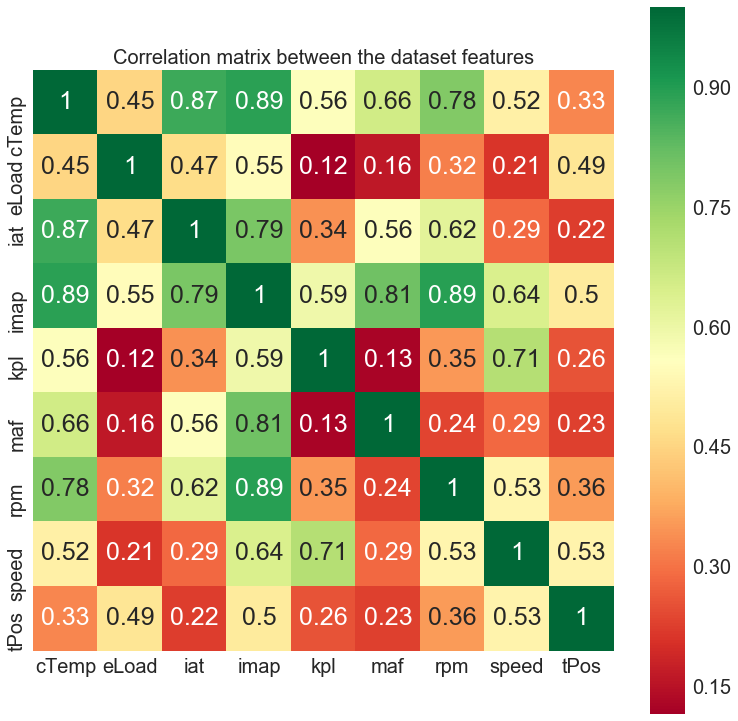

In [88]:
import seaborn as sns

correlation_matrix = trip238_car24.corr(method='pearson')

plt.figure(figsize=(13,13))

plt.rcParams.update({'font.size': 25})
plt.rc('axes', titlesize = 20)
plt.rc('axes', labelsize = 10)
plt.rc('xtick', labelsize = 20)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 20)    # fontsize of the tick labels
plt.rc('legend', fontsize = 20)    # legend fontsize
plt.rc('figure', titlesize = 20)
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='RdYlGn')
plt.title('Correlation matrix between the dataset features')
plt.show()


## Comparing with the non failing car

# Training the Whole dataset


### The objetive is to build a classifer to predict which engine is prone to the 255 fault.
### To do that, is necessary extract the time series features. This will be done with  tsfresh

For extracting all features, we do:

Details in : http://tsfresh.readthedocs.io/en/latest/api/tsfresh.feature_extraction.html


__ComprehensiveFCParameters__ : includes all features without parameters and all features with parameters, each with different parameter combinations. This is the default for extract_features if you do not hand in a default_fc_parameters at all.

In [34]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

In [ ]:
extraction_settings = ComprehensiveFCParameters()

In [ ]:
# n_jobs : Number of threads

X = extract_features(timeseries, 
                     column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     impute_function= impute, n_jobs= 4)

In [ ]:
X.head()

In [ ]:
X.info()

### Further, you can even perform the extraction, imputing and filtering at the same time with the tsfresh.extract_relevant_features() function:

In [ ]:
X_filtered = extract_relevant_features(timeseries, y, 
                                       column_id='id', column_sort='time', 
                                       default_fc_parameters=extraction_settings)

In [ ]:
X_filtered.head()

In [ ]:
X_filtered.info()

# Train and evaluate a DecisionTreeClassifier

### Now, train with the filtered data

In [ ]:
DecisionTree2 = DecisionTreeClassifier()

DecisionTree2.fit(X_filtered_train, y_train)

print(classification_report(y_test, DecisionTree2.predict(X_filtered_test)))

In [ ]:
## confusion  matrix

In [ ]:
from sklearn.metrics import confusion_matrix


y_predicted = DecisionTree2.predict(X_filtered)



In [ ]:
confusion_matrix(y, y_predicted)

pd.crosstab(y, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

### The diagonal elements show the number of correct classifications for each class
### The off-diagonal elements provides the misclassifications
### The total number of classifications for each class in both y_true and y_pred, from the "All" subtotals¶


# Train and evaluate a RandomForestRegressor 

### Now, train with the filtered data

In [ ]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:", scores.mean())
    print("Standard	deviation:",scores.std())

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor()

forest_reg.fit(X_filtered_train, y_train)

In [ ]:
forest_scores = cross_val_score(forest_reg, X_filtered_train, y_train, scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix


y_predicted = DecisionTree2.predict(X_filtered)



In [ ]:
confusion_matrix(y, y_predicted)

In [ ]:
pd.crosstab(y, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

## Perform a from GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3,	10], 'max_features': [2, 3, 4]},
 ]


forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')



In [ ]:
grid_search.fit(X_filtered_train, y_train)


In [ ]:
grid_search.best_estimator_


In [ ]:
cvres = grid_search.cv_results_


In [ ]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),	params)


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_



In [ ]:
feature_importances


In [33]:
len(trucks.deviceID.unique())

29